## number of collection point 與 hk total recycling rate

Model Summary:
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.3131      0.011     28.398      0.000       0.287       0.339
Number of G@C collection points  3.194e-05      0.000      0.266      0.798      -0.000       0.000

R-squared: 0.0100


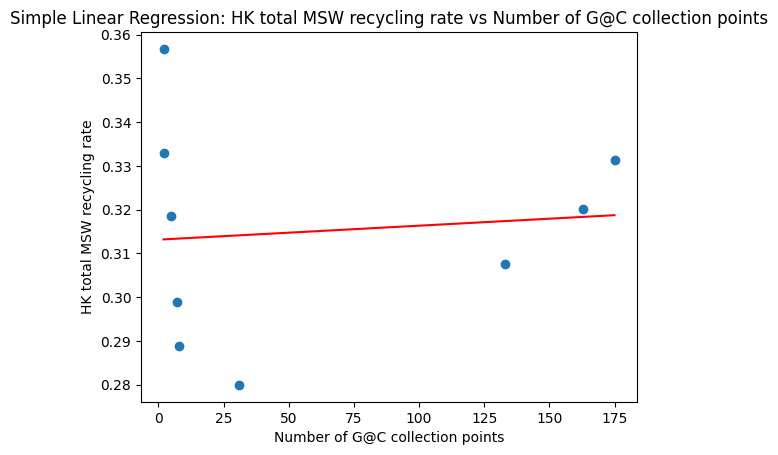

In [2]:
#!pip install pandas numpy matplotlib scikit-learn statsmodels openpyxl
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

from statsmodels.miscmodels.ordinal_model import OrderedModel
import statsmodels.api as sm

import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("../General Stats_G@C_clean.xlsx")

# Column names in the Excel file
col_points = "Number of G@C collection points"
col_rate   = "HK total MSW recycling rate"

# Prepare data
#   - keep only rows where BOTH variables are non-missing
sub = df[[col_points, col_rate]].dropna()

X_gc = sub[[col_points]]          # predictor: number of G@C points
y_rate = sub[col_rate]            # outcome: HK total MSW recycling rate (in decimal, e.g. 0.33)

# Fit model using sklearn for predictions
lin_reg_gc = LinearRegression()
lin_reg_gc.fit(X_gc, y_rate)

# Fit model using statsmodels for statistical tests
X_gc_sm = sm.add_constant(X_gc)   # Add constant term for intercept
model_gc = sm.OLS(y_rate, X_gc_sm)
results_gc = model_gc.fit()

# Predictions for plotting
y_pred_gc = lin_reg_gc.predict(X_gc)

print("Model Summary:")
print(results_gc.summary().tables[1])  # Print coefficient statistics
print(f"\nR-squared: {results_gc.rsquared:.4f}")

# Plot
plt.scatter(X_gc, y_rate)
plt.plot(X_gc, y_pred_gc, color='red')
plt.xlabel('Number of G@C collection points')
plt.ylabel('HK total MSW recycling rate')
plt.title('Simple Linear Regression: HK total MSW recycling rate vs Number of G@C collection points')
plt.show()


**Collection-points coefficient ($\hat \beta_1$) ≈ 0.00003 (p ≈ 0.80 > 0.05)**  

- The slope is **very close to zero**: increasing the number of G@C collection points is associated with only a **tiny change** in the overall HK MSW recycling rate (about **0.003 percentage points** for each additional point).  

- The effect is **not statistically significant** (p-value ≈ 0.80), so we cannot conclude that the number of G@C collection points has a real impact on the overall HK recycling rate based on this data. 

- The model’s **(R² ≈ 0.01)**, meaning the number of collection points explains only about **1% of the variance** in the HK total MSW recycling rate; almost all the variation is driven by other factors.
